In [1]:
import os
# directory of the logs
dirs = {38:'../../logs/bus_38_Jan10_2024/', 89:'../../logs/bus_89_Jan10_2024/'}

result_dict = {}

for key, value in dirs.items():
    sub_dirs = ['filtered/', 'non_augmented/']
    for sub_dir in sub_dirs:
        # get all the files in the directory
        files = os.listdir(value + sub_dir)
        # for each file
        for file in files:
            # open the file
            with open(value + sub_dir + file, 'r') as f:
                # read the file
                lines = f.readlines()
                # for each line
                is_solution = False
                for line in lines:
                    # if the line contains the word 'error'
                    if 'Result: Success' in line:
                        is_solution = True
                        break
                if is_solution:
                    count = 0
                    for line in lines:
                        if ('partial program added to the DSL: ' in line) or ('Program: ' in line):
                            count += 1
                    if(count > 10):
                        print(value + sub_dir + file)
                    if key not in result_dict:
                        result_dict[key] = {}
                    if sub_dir not in result_dict[key]:
                        result_dict[key][sub_dir] = []
                    result_dict[key][sub_dir].append(count)

print(result_dict)
                    

../../logs/bus_89_Jan10_2024/filtered/sygus_A-BUS_86_1.log
{38: {'filtered/': [1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], 'non_augmented/': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}, 89: {'filtered/': [1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2], 'non_augmented/': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}}


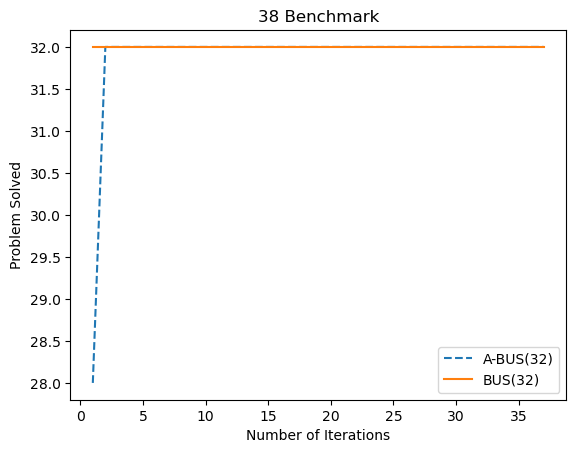

In [2]:
import pandas as pd
x = [1, 2, 3, 4, 37]
y_38_aug = []
y_38_non_aug = []
df = pd.DataFrame(result_dict[38])
for i in x:
    # count the number of times i appears in the list 
    y_38_aug.append((df['filtered/'] <= i).sum())
    y_38_non_aug.append((df['non_augmented/'] <= i).sum())

# plot the graph
import matplotlib.pyplot as plt
plt.plot(x, y_38_aug, label='A-BUS(' + str(y_38_aug[-1]) + ')', linestyle = '--')
plt.plot(x, y_38_non_aug, label='BUS(' + str(y_38_non_aug[-1]) + ')', linestyle = '-')
plt.xlabel('Number of Iterations')
plt.ylabel('Problem Solved')
plt.title('38 Benchmark')
plt.legend()
plt.show()


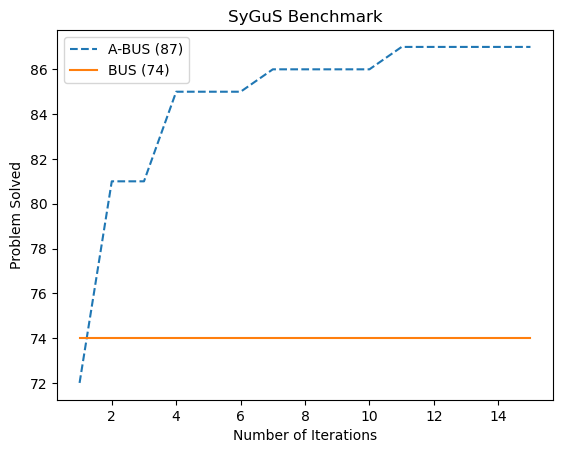

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data from result_dict
augmented = result_dict[89]['filtered/']
non_augmented = result_dict[89]['non_augmented/']

# Determine the longer length
max_length = max(len(augmented), len(non_augmented))
max_value = max(max(augmented), max(non_augmented))

# Extend the shorter list with zeros
augmented.extend([0] * (max_length - len(augmented)))
non_augmented.extend([0] * (max_length - len(non_augmented)))

# Create DataFrame
df = pd.DataFrame({'filtered/': augmented, 'non_augmented/': non_augmented})

# Initialize lists for storing sums
y_89_aug = []
y_89_non_aug = []

# Calculate sums for each value in x
for i in range(1, max_value + 5, 1):
    y_89_aug.append(df[(df['filtered/'] <= i) & (df['filtered/'] > 0)]['filtered/'].count())
    y_89_non_aug.append(df[(df['non_augmented/'] <= i) & (df['non_augmented/'] > 0)]['non_augmented/'].count())

# Plotting the graph
plt.plot([x for x in range(1, max_value + 5)], y_89_aug, label='A-BUS' + ' (' + str(y_89_aug[-1]) + ')', linestyle = '--')
plt.plot([x for x in range(1, max_value + 5)], y_89_non_aug, label='BUS' + ' (' + str(y_89_non_aug[-1]) + ')', linestyle = '-')
plt.xlabel('Number of Iterations')
plt.ylabel('Problem Solved')
plt.title('SyGuS Benchmark')
plt.legend()
plt.show()


In [5]:
import subprocess
import sys
import statistics as st
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from collections import OrderedDict
import pandas as pd
import numpy as np

matplotlib.use('pgf')
matplotlib.rcParams.update({
  'pgf.texsystem': 'pdflatex',
  'font.family': 'serif',
  'text.usetex': True,
  'pgf.rcfonts': False,
})

# 2. Define the figure
px = 1/plt.rcParams['figure.dpi'] 
figfull, axs = plt.subplots(1, 2, figsize=(620*px, 270*px), sharey=False, gridspec_kw={'hspace': 0.0, 'wspace': 0.14, 'bottom':0.15, 'left':0.064, 'right':0.99, 'top':0.90})

# Ticks and labels formatting
for ax in axs:
    ax.xaxis.set_major_locator(tick.MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(tick.MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.margins(x=0.12, y=0.12)

# First subplot for 89 Benchmark
df_89 = pd.DataFrame(result_dict[89])
x_89 = [x for x in range(1, max_value + 1)]
y_89_aug = []
y_89_non_aug = []

for i in x_89:
    y_89_aug.append(df_89[(df_89['filtered/'] <= i) & (df_89['filtered/'] > 0)]['filtered/'].count())
    y_89_non_aug.append(df_89[(df_89['non_augmented/'] <= i) & (df_89['non_augmented/'] > 0)]['non_augmented/'].count())

axs[0].text(x_89[-1], y_89_aug[-1], y_89_aug[-1], fontsize=8)
axs[0].text(x_89[-1], y_89_non_aug[-1], y_89_non_aug[-1], fontsize=8)
axs[0].plot(x_89, y_89_aug, label='A-BUS', linestyle='--')
axs[0].plot(x_89, y_89_non_aug, label='BUS', linestyle='-')
axs[0].set_xlabel('Number of Iterations', fontsize=10)
axs[0].set_ylabel('Problem Solved', fontsize=10)
axs[0].set_title('SyGuS Benchmark', fontsize=16)
axs[0].legend(loc='center right', ncol=1, fontsize=8)

# Second subplot for 38 Benchmark
df_38 = pd.DataFrame(result_dict[38])
x_38 = [1, 2, 3, 4]
y_38_aug = []
y_38_non_aug = []

for i in x_38:
    y_38_aug.append(df_38[(df_38['filtered/'] <= i) & (df_38['filtered/'] > 0)]['filtered/'].count())
    y_38_non_aug.append(df_38[(df_38['non_augmented/'] <= i) & (df_38['non_augmented/'] > 0)]['non_augmented/'].count())

axs[1].text(x_38[-1], y_38_aug[-1], y_38_aug[-1], fontsize=8)
axs[1].plot(x_38, y_38_aug, label='A-BUS', linestyle='--')
axs[1].plot(x_38, y_38_non_aug, label='BUS', linestyle='-')
axs[1].set_xlabel('Number of Iterations', fontsize=10)
axs[1].set_title('38 Benchmark', fontsize=16)
axs[1].legend(loc='lower right', ncol=1, fontsize=8)

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()
plt.savefig("./filtered_vs_non_augmented.pdf")

/var/folders/42/dmtfwt_d4tzcz1_nf6n174ww0000gn/T/ipykernel_14017/3507016291.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/42/dmtfwt_d4tzcz1_nf6n174ww0000gn/T/ipykernel_14017/3507016291.py:70: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()
